<a href="https://colab.research.google.com/github/xecon/github-upload/blob/master/002_Data_Analysis_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Login using your Workshop Account, so we can access the data
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'ct-workshop-001' # Project ID inserted based on the query results selected to explore
location = 'EU' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [ ]:
%load_ext google.colab.data_table

# Load Data

In [ ]:
# prompt: # prompt: get data from bigquery table ct-workshop-001.workshop_datasets.dummy_data_clean_20241208

# Construct a BigQuery client object.
# client = bigquery.Client()  # This line is already in the provided code.

# Specify the table you want to read from.
table_id = f"ct-workshop-001.workshop_datasets.dummy_data_clean_20241208"
usernr = 46 # @param {type:"integer"}
table_id = f"ct-workshop-001.workshop_workspace{usernr}.dummy_data_clean_{today}"

table_ref = client.get_table(table_id)

# Perform a query.
query_job = client.query(f"""
    SELECT *
    FROM `{table_ref}`
""")

# Get the results.
results = query_job.result().to_dataframe()
results

,first_name,last_name,data_engineering,data_analysis,data_science,ml_engineering,role,work,gender,age,total_skill
0,Person,14,0,1,3,0,Data Engineer,build predictive models in Python,F,23,4
1,Person,7,2,1,0,0,BI Developer,deploy models to production with BigQuery,F,44,3
2,Person,13,2,1,2,0,IT Support Specialist,visualize data in Excel,F,55,5
3,Person,5,0,0,1,1,IT Support Specialist,troubleshoot issues using Excel,F,28,2
4,Person,11,0,0,1,1,IT Support Specialist,process data with BigQuery,F,27,2
5,Person,3,1,1,1,1,Project Manager,optimize workflows with IntelliJ,F,23,4
6,Person,21,1,1,0,1,Data Engineer,process data with Jira,F,29,3
7,Person,1,2,1,1,1,BI Developer,audit data access using DBT,F,37,5
8,Person,6,2,2,2,1,DPO,audit data access using DBT,F,52,7
9,Person,19,2,0,1,3,Data Scientist,process data with Collibra,F,50,6


# Visualize Data

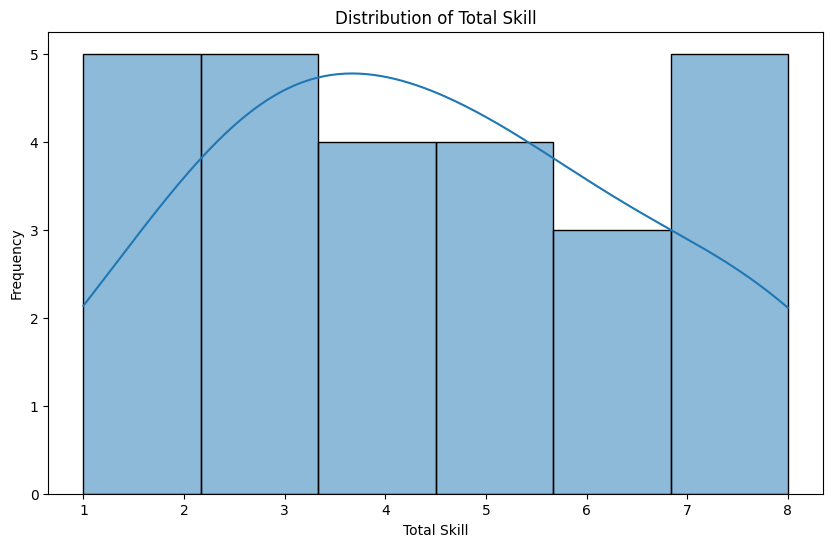

In [ ]:
# prompt: Show the distribution of the total skill

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'total_skill' is the column name representing the total skill
# Replace 'total_skill' with the actual column name if different
plt.figure(figsize=(10, 6))
sns.histplot(results['total_skill'], kde=True)
plt.title('Distribution of Total Skill')
plt.xlabel('Total Skill')
plt.ylabel('Frequency')
plt.show()

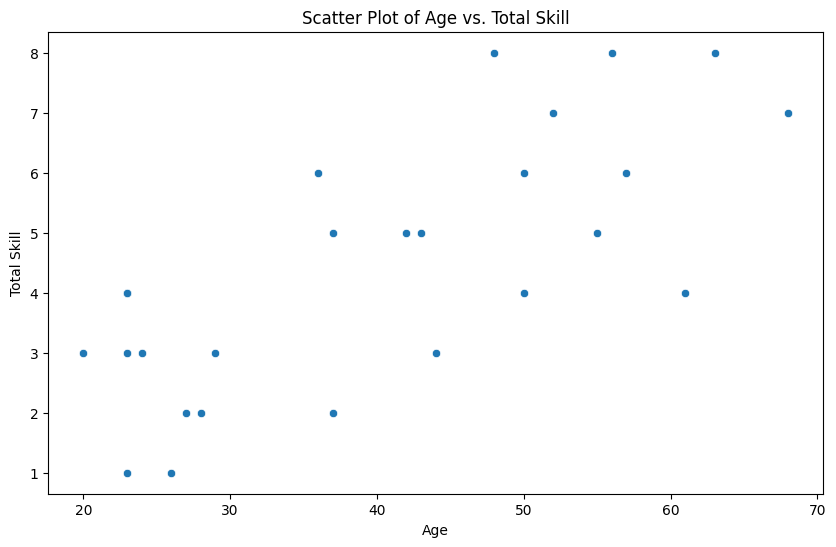

In [ ]:
# prompt: make a scatterplot of age (x) and total skill (y)

# Assuming 'age' is the column name representing age
# Replace 'age' with the actual column name if different

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_skill', data=results)
plt.title('Scatter Plot of Age vs. Total Skill')
plt.xlabel('Age')
plt.ylabel('Total Skill')
plt.show()

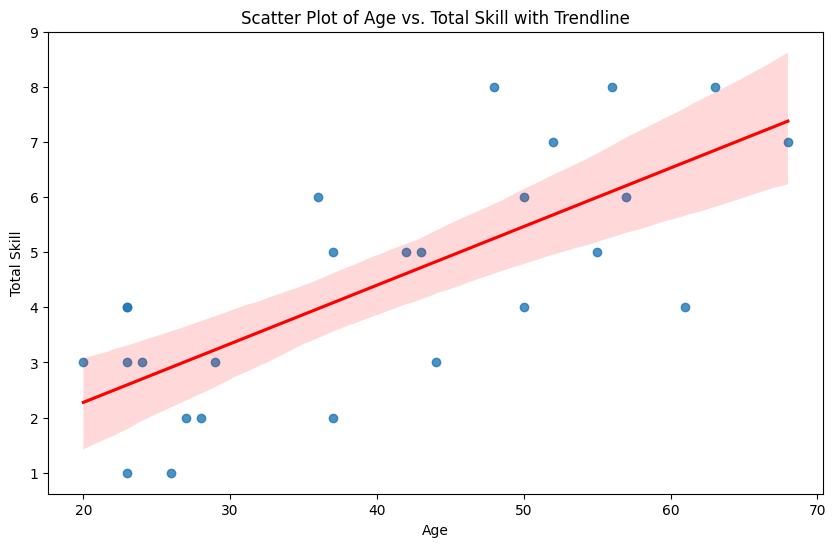

In [ ]:
# prompt: make a scatterplot of age (x) and total skill (y) and draw a trendline

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'age' and 'total_skill' are the correct column names
# If not, replace them with the actual column names from your dataframe

plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='total_skill', data=results, line_kws={"color": "red"}) # Added line_kws for red trendline
plt.title('Scatter Plot of Age vs. Total Skill with Trendline')
plt.xlabel('Age')
plt.ylabel('Total Skill')
plt.show()

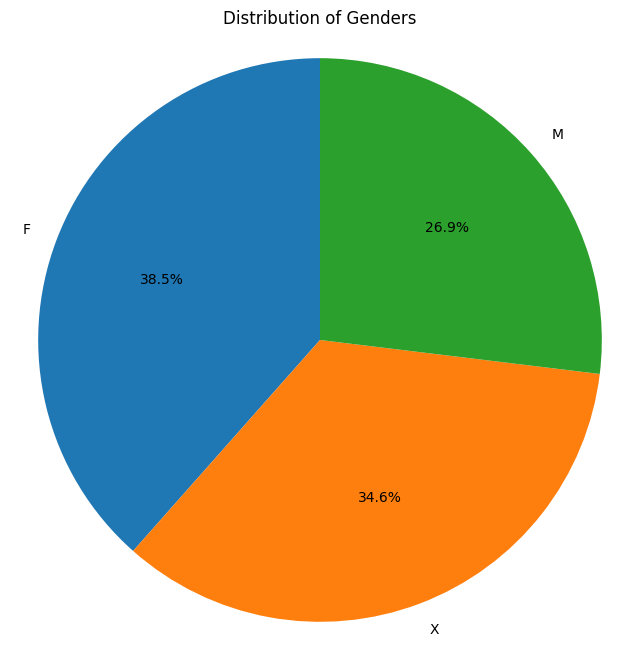

In [ ]:
# prompt: show a pie chart of genders

import matplotlib.pyplot as plt

# Assuming 'gender' is the column name representing gender in your dataframe 'results'
# Replace 'gender' if your column has a different name

gender_counts = results['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

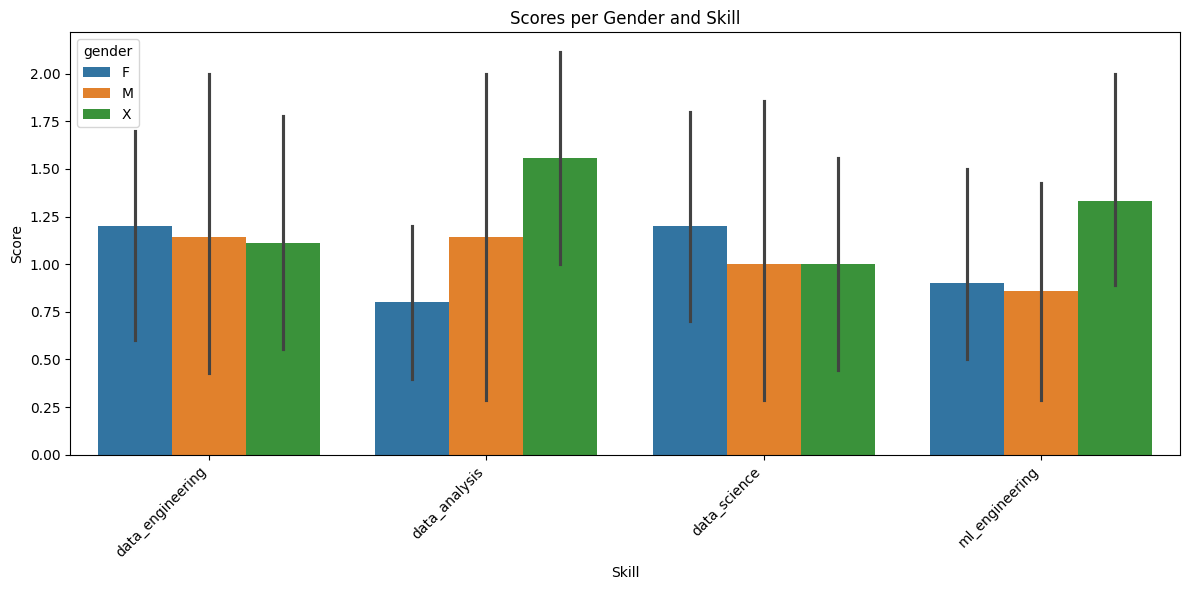

In [ ]:
# prompt: show a bar chart with per gender, the scores for data_engineering	data_analysis	data_science	ml_engineering

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame called 'results'
# and the columns are 'gender', 'data_engineering', 'data_analysis', 'data_science', 'ml_engineering'

# Reshape the data for plotting
melted_results = results.melt(id_vars='gender', value_vars=['data_engineering', 'data_analysis', 'data_science', 'ml_engineering'],
                              var_name='Skill', value_name='Score')


plt.figure(figsize=(12, 6))
sns.barplot(x='Skill', y='Score', hue='gender', data=melted_results)
plt.title('Scores per Gender and Skill')
plt.xlabel('Skill')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


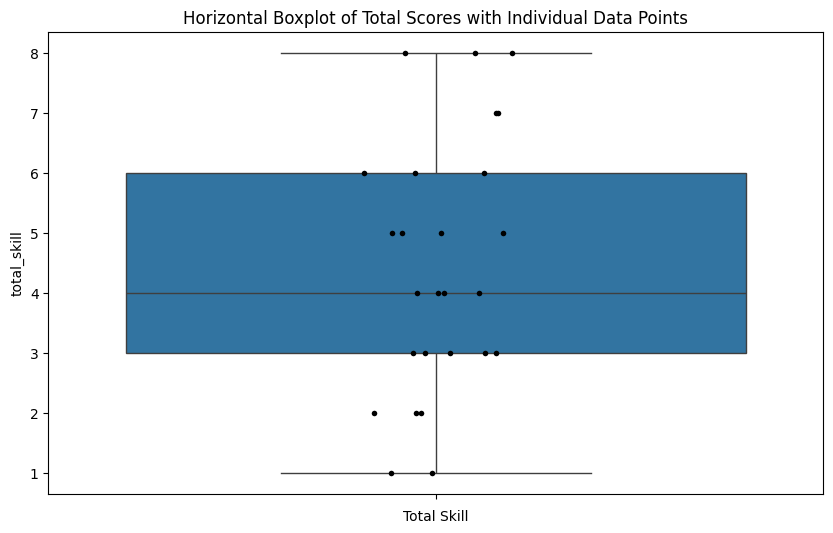

In [ ]:
# prompt: show a boxplot of total scores, horizontal, and add individual data points

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'total_skill' is the column name for total scores in your 'results' DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_skill', data=results, orient='h') # horizontal boxplot
sns.stripplot(y='total_skill', data=results, orient='h', color='black', size=4) # individual data points
plt.title('Horizontal Boxplot of Total Scores with Individual Data Points')
plt.xlabel('Total Skill')
plt.show()

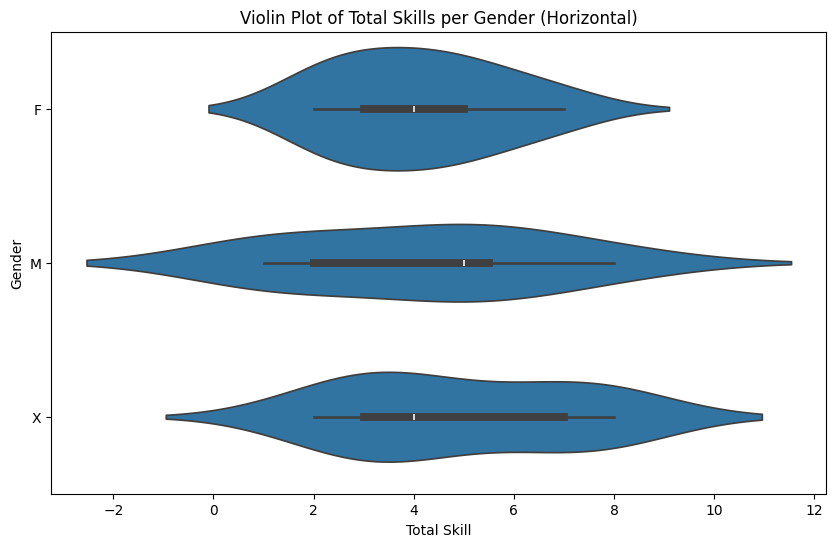

In [ ]:
# prompt: show a violin plot (horizontal) of total scores per gender

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'total_skill' and 'gender' are the correct column names
# If not, replace them with the actual column names from your dataframe 'results'

plt.figure(figsize=(10, 6))
sns.violinplot(x='total_skill', y='gender', data=results, orient='h')
plt.title('Violin Plot of Total Skills per Gender (Horizontal)')
plt.xlabel('Total Skill')
plt.ylabel('Gender')
plt.show()

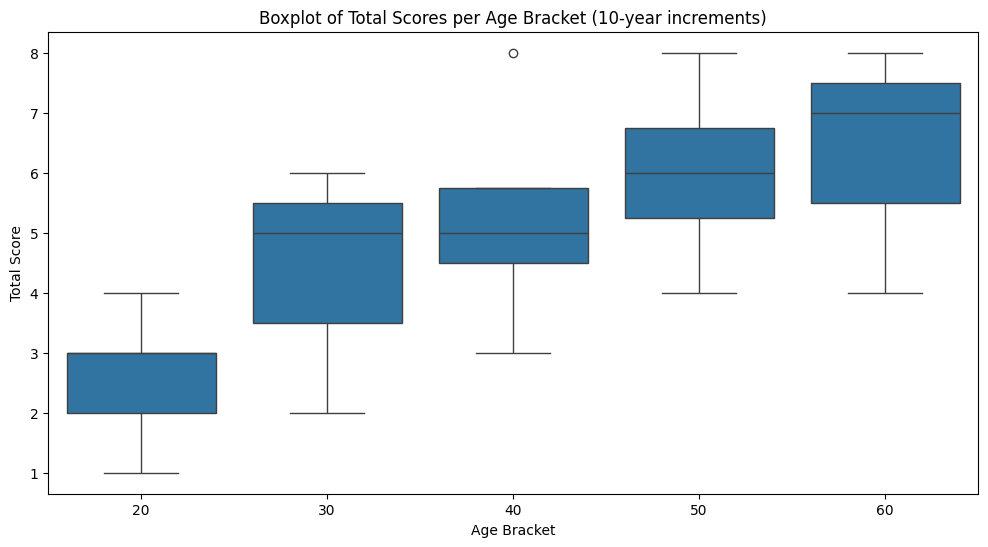

In [ ]:
# prompt: show per age bracket of 10, the boxplot of total scores

# Assuming 'age' and 'total_skill' are the correct column names
# If not, replace them with the actual column names from your dataframe

import matplotlib.pyplot as plt
import seaborn as sns

# Create age brackets
results['age_bracket'] = (results['age'] // 10) * 10

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_bracket', y='total_skill', data=results)
plt.title('Boxplot of Total Scores per Age Bracket (10-year increments)')
plt.xlabel('Age Bracket')
plt.ylabel('Total Score')
plt.show()